In [114]:
# imports

In [115]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [116]:
boston_dataset = load_boston()
pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
print(boston.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16   91.29    7.14    9.20  
min    187.00    12.60    0.32    1.73    5.00  
25%    279.00    17.40  3

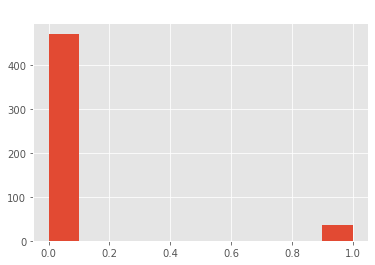

In [117]:
boston.hist(column='CHAS')
plt.show()

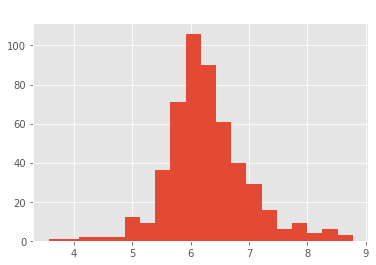

In [118]:
boston.hist(column='RM', bins=20)
plt.show()

In [119]:
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

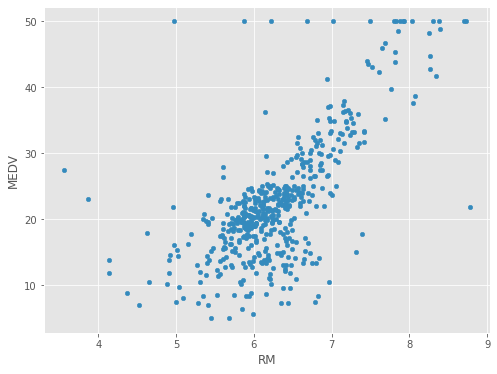

In [120]:
boston.plot(kind='scatter', x='RM', y='MEDV', figsize=(8,6))
plt.show()

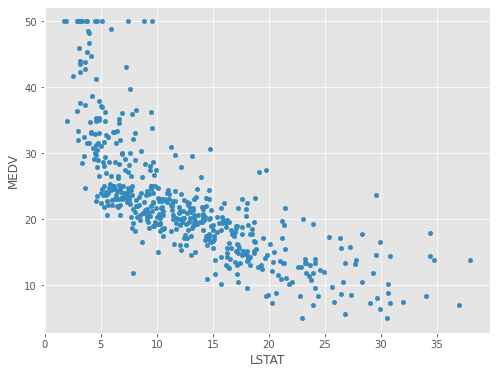

In [121]:
boston.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(8,6))

## Analyzing data

### Preparing data

In [122]:
X = boston[['RM']]
print(X.shape)
Y = boston['MEDV']
print(Y.shape)

(506, 1)
(506,)


### Preparing model

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Separating training and testing data

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


### Fitting the model

In [128]:
model.fit(X_train, Y_train) # y = m*x + b
print(model.intercept_.round(2)) # b
print(model.coef_.round(2)) # m

-30.57
[8.46]


### Try predict

In [135]:
new_RM = np.array([6.5]).reshape(-1,1)
print(model.predict(new_RM))
print(model.intercept_ + model.coef_*6.5)

[24.42606323]
[24.42606323]


### Mathematical testing how good is model

In [162]:
print(X_test.head())
print()
print(pd.DataFrame(model.predict(X_test)).head().round(2))
print()
print(Y_test.head().round(2))
print()
print((model.predict(X_test)-Y_test).head().round(2))

        RM
307  6.849
343  6.696
47   6.030
67   5.878
362  5.362

       0
0  27.38
1  26.08
2  20.45
3  19.16
4  14.80

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: MEDV, dtype: float64

307   -0.82
343    2.18
47     3.85
67    -2.84
362   -6.00
Name: MEDV, dtype: float64


### Graphs of how good is model

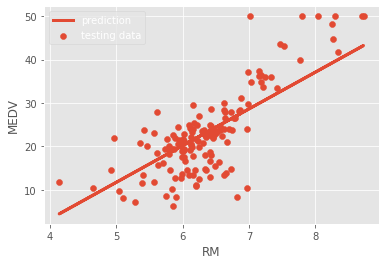

In [147]:
Y_test_predicted = model.predict(X_test)
plt.scatter(X_test, Y_test, label='testing data')
plt.plot(X_test, Y_test_predicted, label='prediction', linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

### Residuals graphs

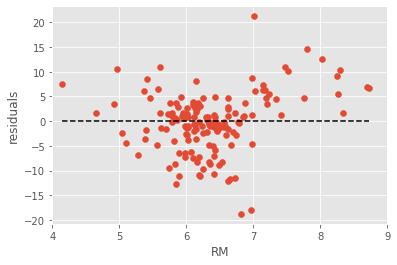

In [159]:
residuals = Y_test - Y_test_predicted

plt.scatter(X_test, residuals)
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), linestyles='--')
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('residuals')
plt.show()
##% md
### Mathematical testing

In [166]:
print(residuals[:5])
print()
print(residuals.mean())
print()
print((residuals**2).mean())
print()
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_test_predicted)) # MSE
print()
import math
print(math.sqrt(mean_squared_error(Y_test, Y_test_predicted))) # RMSE

307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64

-0.2364508776638856

36.517214730838624

36.517214730838624

6.042947520112898


### Another score

In [170]:
print(model.score(X_test, Y_test))
print()
print(((Y_test-Y_test.mean())**2).sum())
print()
print((residuals**2).sum())
print()
print(1-(residuals**2).sum()/(((Y_test-Y_test.mean())**2).sum()))

0.6015774471545623

13931.482039473683

5550.6166390874705

0.6015774471545623


## Multivariate Linear Regression

In [178]:
## data preparation
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
## train test split
## same random_state to ensure the same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y,
  test_size = 0.3,
  random_state=1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)
print("Parameters y =", model2.intercept_.round(2),
      " + RM*(", model2.coef_[0].round(2), ") + LSTAT*(",
      model2.coef_[1].round(2), ")")

Parameters y = 5.32  + RM*( 4.13 ) + LSTAT*( -0.68 )


### Predicting

In [179]:
Y_test_predicted2 = model2.predict(X2_test)

### Comparing

In [180]:
print(mean_squared_error(Y_test, Y_test_predicted))
print(mean_squared_error(Y_test, Y_test_predicted2))

36.517214730838624
28.934491341086545
